In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade typing-extensions

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
Note: you may need to restart the kernel to use updated packages.


### Simple ViT

In [1]:
import torch
from vit_pytorch import ViT

In [2]:
v = ViT(
    image_size = 256,
    patch_size = 32,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

img = torch.randn(1, 3, 256, 256)

preds = v(img)

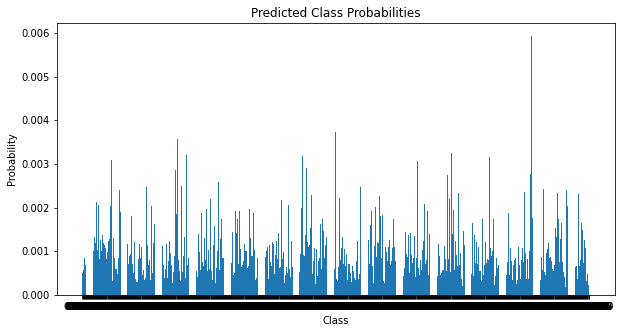

In [10]:
# Get predictions from the ViT model
import matplotlib.pyplot as plt

# Convert predictions tensor to probabilities
probabilities = torch.softmax(preds, dim=1).squeeze().detach().numpy()

# Get the class labels (replace this with your actual class labels)
class_labels = [f"Class {i}" for i in range(probabilities.shape[0])]

# Plot the predicted probabilities
plt.figure(figsize=(10, 5))
plt.bar(class_labels, probabilities)
plt.title("Predicted Class Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

### NaViT

In [13]:
import torch
from vit_pytorch.na_vit import NaViT

v = NaViT(
    image_size = 256,
    patch_size = 32,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1,
    token_dropout_prob = 0.1  
)

images = [
    [torch.randn(3, 256, 256), torch.randn(3, 128, 128)],
    [torch.randn(3, 128, 256), torch.randn(3, 256, 128)],
    [torch.randn(3, 64, 256)]
]

preds = v(images) 

In [14]:
preds.shape

torch.Size([5, 1000])

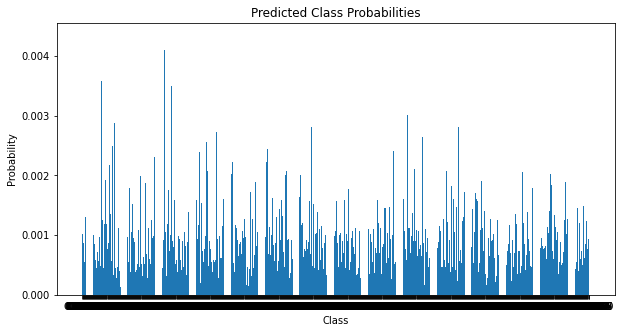

In [17]:

# Convert predictions tensor to probabilities
probabilities = torch.softmax(preds, dim=1).squeeze().detach().numpy()

# Get the class labels (replace this with your actual class labels)
class_labels = [f"Class {i}" for i in range(probabilities.shape[1])]

# Plot the predicted probabilities
plt.figure(figsize=(10, 5))
plt.bar(class_labels, probabilities[0])
plt.title("Predicted Class Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

### Distillation

In [19]:
import torch
from torchvision.models import resnet50
from vit_pytorch.distill import DistillableViT, DistillWrapper

In [20]:
teacher = resnet50(pretrained = True)

v = DistillableViT(
    image_size = 256,
    patch_size = 32,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    heads = 8,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

distiller = DistillWrapper(
    student = v,
    teacher = teacher,
    temperature = 3,           
    alpha = 0.5,               
    hard = False               
)

img = torch.randn(2, 3, 256, 256)
labels = torch.randint(0, 1000, (2,))

loss = distiller(img, labels)
loss.backward()

pred = v(img) 

In [21]:
pred.shape

torch.Size([2, 1000])

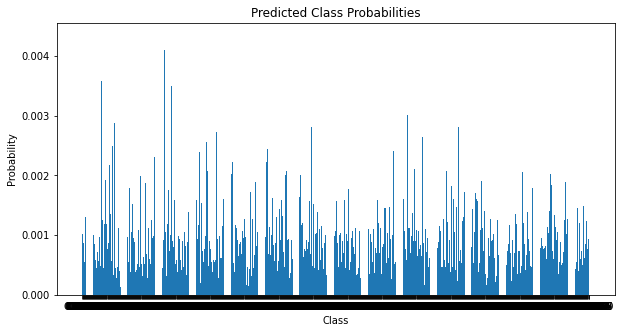

In [22]:
# Convert predictions tensor to probabilities
probabilities = torch.softmax(preds, dim=1).squeeze().detach().numpy()

# Get the class labels (replace this with your actual class labels)
class_labels = [f"Class {i}" for i in range(probabilities.shape[1])]

# Plot the predicted probabilities
plt.figure(figsize=(10, 5))
plt.bar(class_labels, probabilities[0])
plt.title("Predicted Class Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()